# Phone Price Prediction

## Table of Contents

1. [**Introduction**](#1)
	- Project Description
    - Data Description

2. [**Acquiring and Loading Data**](#2)
	- Importing Libraries
    - Reading in Data
    - Exploring Data

3. [**Data Cleaning**](#3)

4. [**Data Analysis & Visualization**](#4)

5. [**Splitting the Dataset**](#5)  
   - Separating Features and Target  
   - Train-Test Split  

6. [**Model Training**](#6)  
   - Linear Regression  
   - Random Forest Regressor  

7. [**Initial Model Evaluation**](#7)  
   - Evaluation Metrics (MAE, MSE, RMSE, R²)  
   - Model Comparison  

8. [**Testing the Model with New Data**](#8)  
   - Predicting Price of a New Phone
   - Data Preprocessing for New Input  

9. [**Hyperparameter Tuning**](#9)  
   - Using GridSearchCV  
   - Optimizing Parameters for Linear and Random Forest Models  
   - Tuned Model Performance  

10. [**Model Evaluation on Test Data (Tuned Models)**](#10)  
    - MAE, MSE, RMSE, and R² of Tuned Models  
    - Performance Comparison  

11. [**Feature Importance Analysis**](#11)  
    - Top Influential Features  
    - Insights from Random Forest Feature Importances  

12. [**Conclusion**](#12)  
    - Summary of Findings  
    - Model Recommendation  
    - Final Prediction Review  


# 1

## Introduction


### **Project Description**

This project aims to build a machine learning solution for predicting the prices of smartphones based on their technical specifications and features. The dataset includes information such as RAM, storage capacity, display size, camera specs, operating system version, and announcement date for various phone models.
The main goals of this project are to:
- **Explore and preprocess the data**: Handle missing values, extract useful features (e.g., announcement year), scale numerical data, and encode categorical variables.
- **Develop and compare regression models**: Implement and evaluate at least two regression algorithms—Linear Regression and Random Forest Regressor.
- **Tune model hyperparameters**: Optimize model performance using techniques like `GridSearchCV`.
- **Evaluate performance**: Use metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) to assess how well the models perform.
- **Analyze insights**: Identify which features most influence phone pricing and compare the predictive power of each model.
This predictive modeling project not only demonstrates practical regression techniques but also offers insights into the factors that most impact the pricing of mobile devices in the current tech market.




### **Data Description**

The dataset used in this project, named **`cleaned_all_phones`**, consists of information on modern, actively manufactured smartphones. It includes a wide range of hardware and camera features, along with pricing data. The dataset is intended for **non-commercial**, educational use, and can be accessed here on [Kaggle](https://www.kaggle.com/datasets/berkayeserr/phone-prices/data).

Here is a summary of the dataset’s columns:

- **phone_name**: name of the phone  
- **brand**: brand of the phone  
- **os**: operating system the phone runs on  
- **inches**: diagonal screen size in inches  
- **resolution**: screen resolution (e.g., 1080x2400)  
- **battery**: battery capacity in milliamp hours (mAh)  
- **battery_type**: type of battery technology used  
- **ram(GB)**: amount of RAM in gigabytes  
- **announcement_date**: official launch date of the phone  
- **weight(g)**: weight of the phone in grams  
- **storage(GB)**: internal storage capacity in gigabytes  
- **video_720p**: whether the phone camera supports 720p video recording  
- **video_1080p**: whether the phone camera supports 1080p video recording  
- **video_4K**: whether the phone camera supports 4K video recording  
- **video_8K**: whether the phone camera supports 8K video recording  
- **video_30fps**: support for 30 frames per second video  
- **video_60fps**: support for 60 frames per second video  
- **video_120fps**: support for 120 frames per second video  
- **video_240fps**: support for 240 frames per second video  
- **video_480fps**: support for 480 frames per second video  
- **video_960fps**: support for 960 frames per second video  
- **price(USD)**: the price of the phone in U.S. dollars  

**Note**: This dataset was created for machine learning practice and academic use. It is not intended for commercial applications.

# 2

## Acquiring and Loading Data
### Library Import

Import all necessary Python library here.

In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing and utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Reading in Data
Import all necessary data here.

In [2]:
# Load the dataset from the specified file path
phone_df = pd.read_csv("/content/cleaned_all_phones.csv")

### Exploring Data
Conduct an initial inspection of the dataset to understand its structure, identify any missing values or anomalies, and gather descriptive statistics to inform preprocessing and modeling decisions.


In [3]:
# Display the first 5 rows of the dataset to preview its structure
phone_df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [4]:
# Display summary information about the dataset, including column data types and non-null counts
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1512 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   float64
 10  storage(GB)        1512 non-null   int64  
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

#### Notes from Dataset Inspection

- The `.info()` output shows **no missing values** in the dataset.  
    To be thorough, we'll confirm this using `.isnull().sum()`.

- Since there are **no missing values**, preprocessing will be more straightforward.

- The `announcement_date` column will be transformed into a **numerical feature**: `announcement_year`, for better model compatibility.

- **Categorical features** like `brand` and `os` have multiple unique values (high cardinality) and will be handled using **one-hot encoding**.

- **Binary features** (e.g., `video_720p`, `video_1080p`, etc.) are already in **boolean format** (`True/False` or `0/1`), so no additional encoding is required.

- The `phone_name` column is a **text label** with high uniqueness and likely provides no predictive value. It will be **dropped** from the feature set.


In [5]:
# Check for missing values in each column of the dataset
phone_df.isnull().sum()

,0
phone_name,0
brand,0
os,0
inches,0
resolution,0
battery,0
battery_type,0
ram(GB),0
announcement_date,0
weight(g),0


It has been confirmed that the `phone_df` dataset contains **no missing values**, making the preprocessing stage more straightforward.


In [6]:
# Display basic statistical summaries of numerical columns in the dataset
phone_df.describe()


,inches,battery,ram(GB),weight(g),storage(GB),price(USD)
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,6.422460,4389.798942,6.683862,187.636243,109.164683,337.847036
std,0.477043,784.607022,2.701433,26.200115,74.436484,266.740821
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000
25%,6.300000,4000.000000,4.000000,175.000000,64.000000,179.997500
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000
75%,6.670000,5000.000000,8.000000,197.250000,128.000000,400.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000


The `.describe()` method provides key statistics such as count, mean, standard deviation, minimum, maximum, and quartiles for all numerical features. This summary helps us understand the distribution of the data and identify any anomalies or outliers.

From the `.describe()` output above, we observe the following:

- **Screen Size (`inches`):**  
  Ranges from **3.8" to 10.4"** with an average of **6.42"**.  
  Most values fall within typical smartphone sizes, though values above 7.5" could indicate tablets or outliers.

- **Battery Capacity (`battery`):**  
  Varies widely from **1821 mAh to 7250 mAh**, averaging **4389 mAh**.  
  This range suggests the need for feature scaling, especially for models sensitive to magnitude.

- **RAM (`ram(GB)`):**  
  Ranges between **1 GB and 24 GB**, with a mean of **6.68 GB**.  
  The distribution appears skewed toward lower RAM values.

- **Weight (`weight(g)`):**  
  Spans from **130g to 500g**, with an average of **187.6g**.  
  The highest value (500g) may be an outlier since most smartphones weigh between 150g and 220g.

- **Storage (`storage(GB)`):**  
  Ranges from **1 GB up to 512 GB**, with a median around **128 GB**.  
  Many devices cluster between 64 GB and 128 GB, with a few high-end models increasing the maximum.

- **Price (`price(USD)`) (Target Variable):**  
  Varies widely from **$40 to $2300**, with a mean price of **$337.85**.  
  This suggests a high variability and potential right skewness in price distribution.


### Saving a copy of the `phone_df`

In [7]:
# to save a clean copy of the phone_df

phone_df_copy = phone_df.copy()

# 3

## Data Cleaning


### Droping the `phone_name` column

In [8]:
# Drop the 'phone_name' column as it contains unique identifiers
# that offer no predictive value for modeling

phone_df.drop(columns=['phone_name'], inplace=True)

# Verify the DataFrame structure after dropping the column
phone_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1512 non-null   object 
 1   os                 1512 non-null   object 
 2   inches             1512 non-null   float64
 3   resolution         1512 non-null   object 
 4   battery            1512 non-null   int64  
 5   battery_type       1512 non-null   object 
 6   ram(GB)            1512 non-null   int64  
 7   announcement_date  1512 non-null   object 
 8   weight(g)          1512 non-null   float64
 9   storage(GB)        1512 non-null   int64  
 10  video_720p         1512 non-null   bool   
 11  video_1080p        1512 non-null   bool   
 12  video_4K           1512 non-null   bool   
 13  video_8K           1512 non-null   bool   
 14  video_30fps        1512 non-null   bool   
 15  video_60fps        1512 non-null   bool   
 16  video_120fps       1512 

### Extracting Year from Announcement Date


In [9]:
# Extract year from 'announcement_date' column
phone_df['announcement_year'] = pd.to_datetime(phone_df['announcement_date']).dt.year

# Drop the original full date column as it's no longer needed
phone_df.drop(columns=['announcement_date'], inplace=True)


### Confirm the transformation


In [10]:
# Display the first few rows to check the new 'announcement_year' column
phone_df[['announcement_year']].head()


,announcement_year
0,2016
1,2016
2,2017
3,2017
4,2017


# 4

## Data Analysis & Visualization

### Visualizing Numerical Feature Distributions


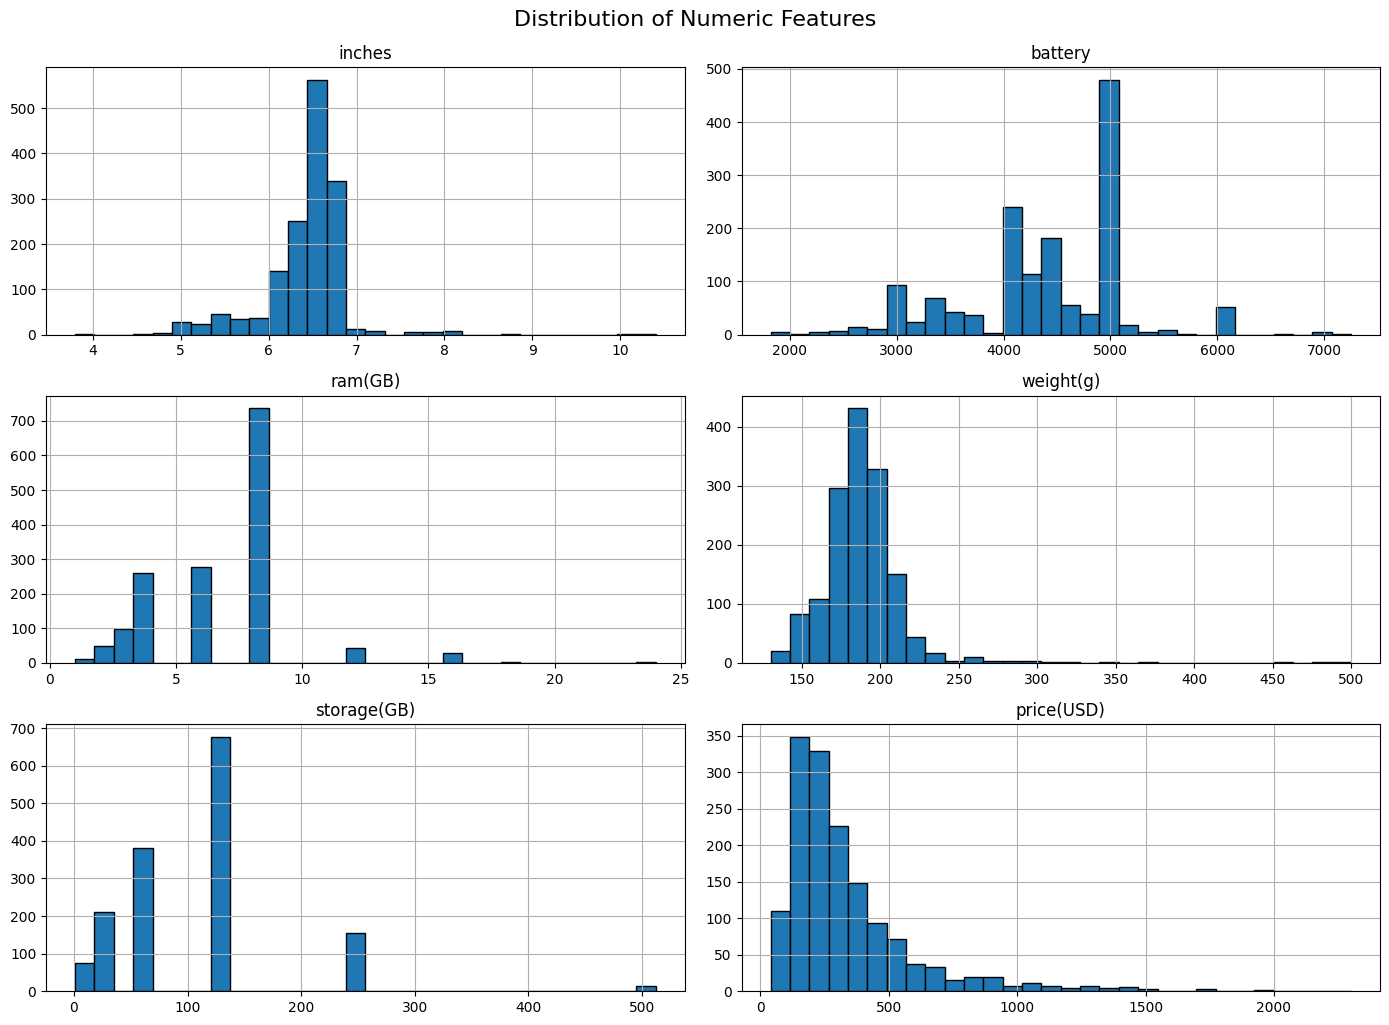

In [11]:
# Define the list of numerical columns to visualize
num_cols = ['inches', 'battery', 'ram(GB)', 'weight(g)', 'storage(GB)', 'price(USD)']

# Plot histograms for each numerical feature
phone_df[num_cols].hist(bins=30, figsize=(14, 10), edgecolor='black')

# Adjust layout and add a super title
plt.tight_layout()
plt.suptitle('Distribution of Numeric Features', fontsize=16, y=1.02)

# Show the plots
plt.show()


### Visualizing Pairwise Relationships Between Numerical Features


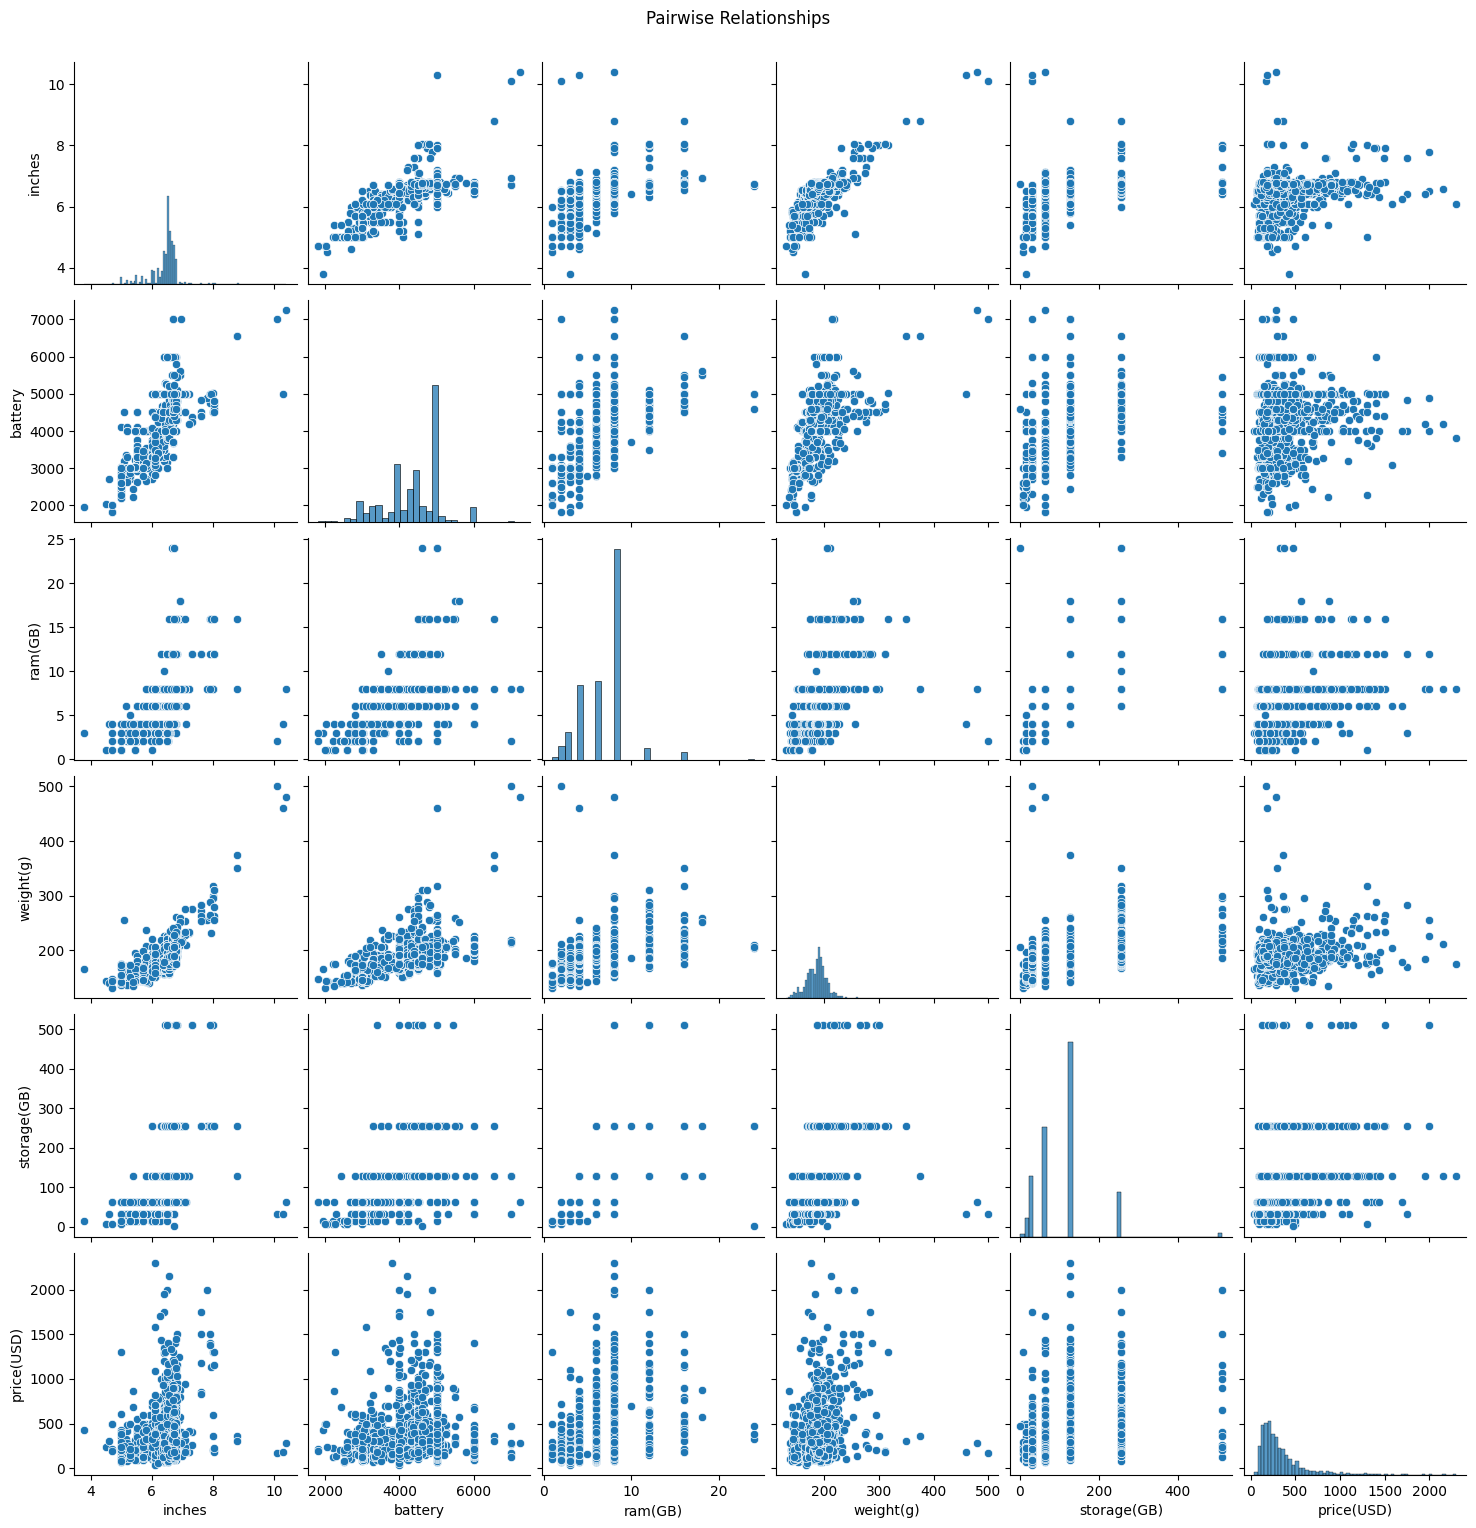

In [12]:
# Create pairwise scatter plots for numerical columns
sns.pairplot(phone_df[num_cols])

# Add a title above the plots
plt.suptitle('Pairwise Relationships', y=1.02)

# Display the plots
plt.show()

### Correlation Heatmap of Numeric Features


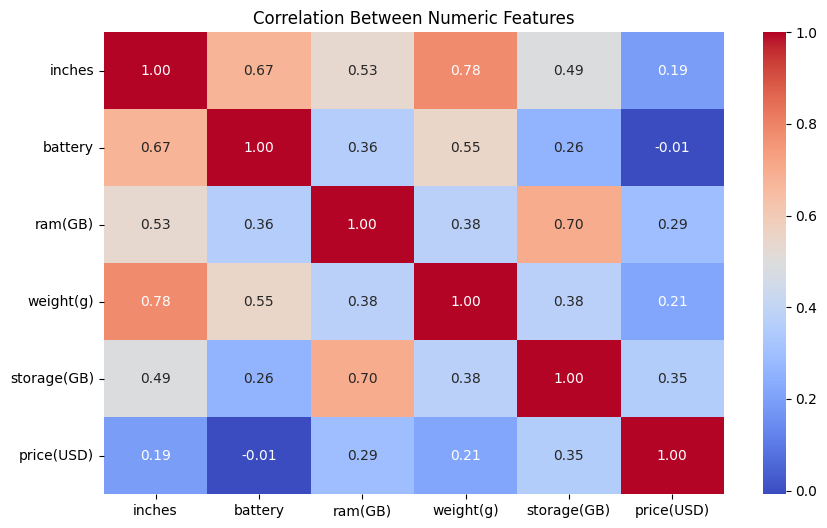

In [13]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Plot heatmap of correlation matrix with annotations and color map
sns.heatmap(phone_df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Add title to the heatmap
plt.title('Correlation Between Numeric Features')

# Show the plot
plt.show()


### Boxplots for Numeric Features to Detect Outliers

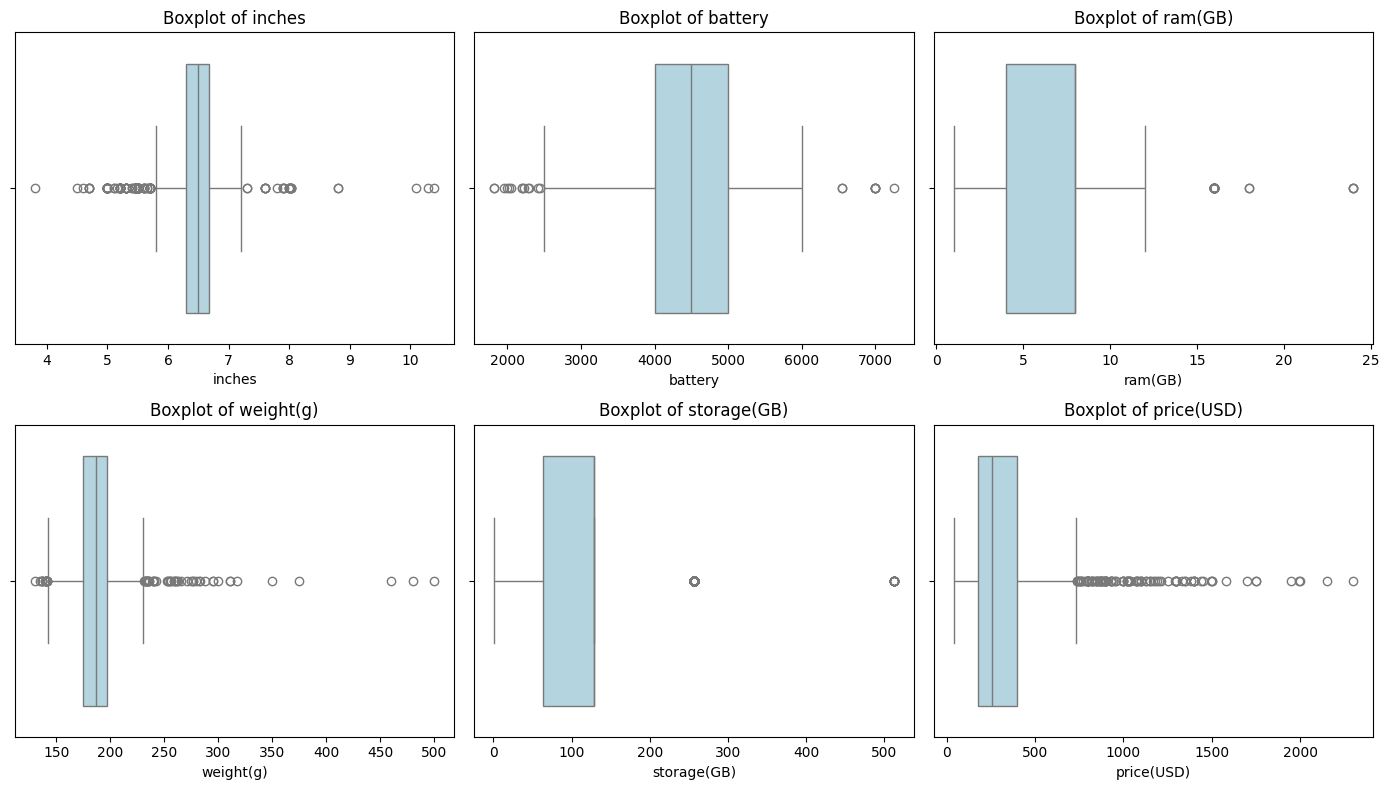

In [14]:
plt.figure(figsize=(14, 8))

# Loop through each numeric column and create a boxplot
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=phone_df, x=col, color='lightblue')
    plt.title(f'Boxplot of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()



### Average Prices By Brand



In [15]:
phone_df['brand'].value_counts()
# This returns the count of each brand in the dataset.

,count
brand,
Xiaomi,264
Oppo,213
Samsung,206
Vivo,168
Realme,157
Huawei,137
Honor,124
LG,75
OnePlus,47


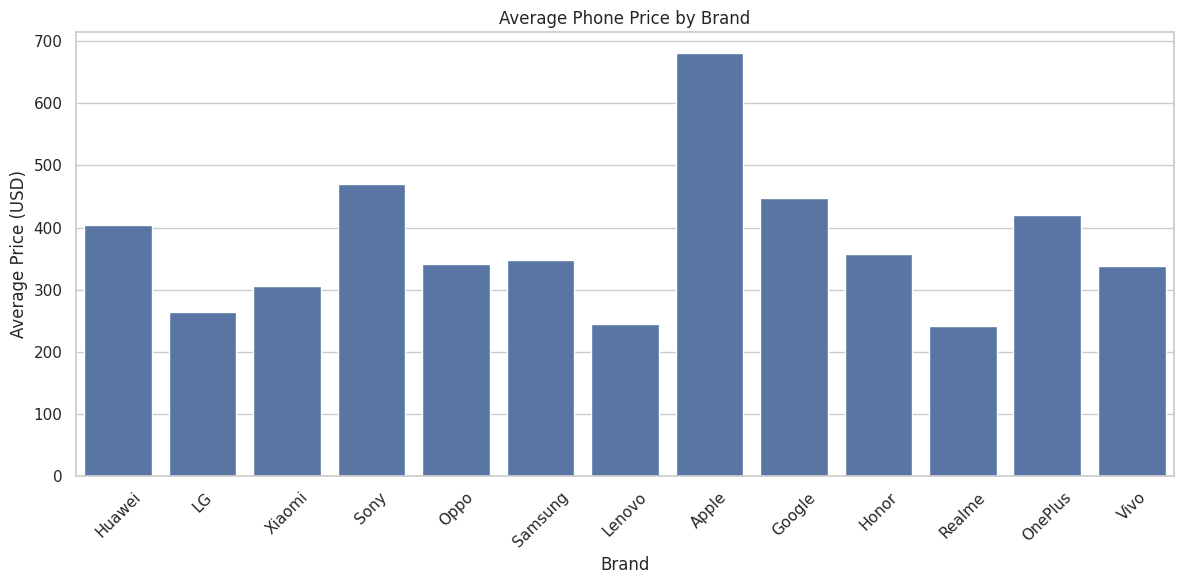

In [16]:
# Set the plot style
sns.set(style="whitegrid")

# Create the barplot: Brand vs Average Price
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price(USD)', data=phone_df, estimator='mean', errorbar=None)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add title and axis labels
plt.title('Average Phone Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (USD)')

# Show plot
plt.tight_layout()
plt.show()


It can be observed from the chart that:

* Apple has the highest average phone price, with the average exceeding $600.

* Lenovo and Realme have the lowest average prices, both falling below $250.

* Sony, Google, and OnePlus are in the mid-range category, with average prices around $400–$475.

* Huawei, Oppo, Samsung, Honor, and Vivo also fall within a mid-range of approximately $300–$400.

* LG and Xiaomi have moderate prices, higher than Realme and Lenovo but lower than premium brands like Apple.

### Distribution of Average Phone Prices by Year

In [17]:
# Count the number of phones announced each year
phone_df.announcement_year.value_counts()

,count
announcement_year,
2022,319
2020,294
2021,288
2019,210
2023,159
2018,155
2017,85
2016,2


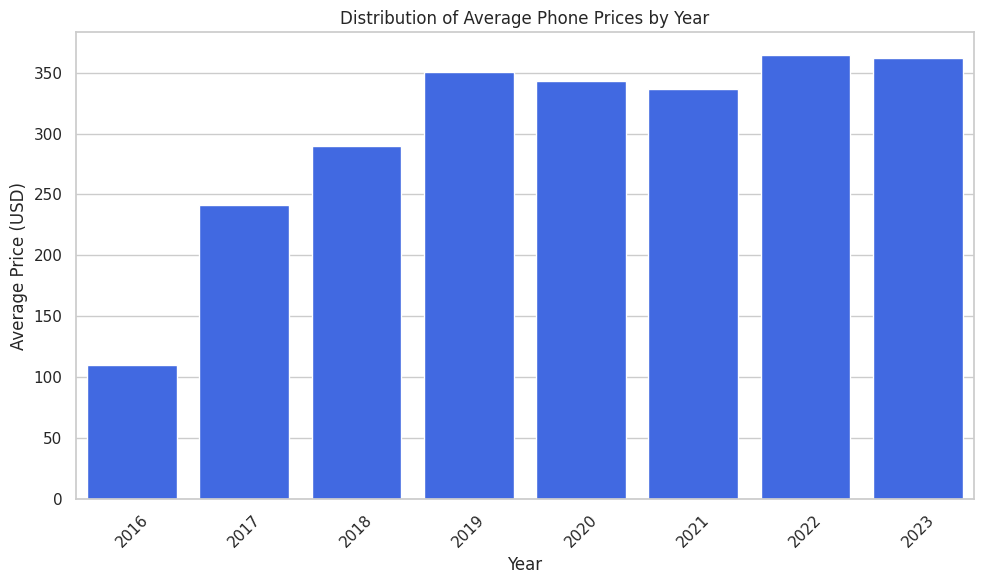

In [18]:
plt.figure(figsize=(10, 6))

# Barplot showing average phone prices per announcement year
sns.barplot(
    data=phone_df,
    x='announcement_year',
    y='price(USD)',
    color='royalblue',
    errorbar=None,
    saturation=1  # Enhances color intensity
)

plt.title('Distribution of Average Phone Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

plt.show()




**It can be observed from the chart above that:**

* There is a clear upward trend in average phone prices from 2016 to 2023.
* The average price in 2016 was the lowest across the years.
* A significant increase occurred between 2016 and 2017, marking the start of a steady rise.
* From 2017 to 2019, average prices continued to climb gradually.
* Between 2019 and 2023, average phone prices remained consistently high with minor fluctuations.
* The peak in average prices occurred in 2022 and 2023, suggesting a possible rise in premium models or market shifts.



### Number Of Phones By Operating Sysem

In [19]:
# Display the unique operating systems present in the dataset
phone_df.os.unique()

array(['Android 5.1', 'Android 7.0', 'Android 6.0', 'Android 7.1',
       'Android 6', 'Android 7.0.1', 'Android 6.0.1', 'Android 7.1.1',
       'Tizen 3.0', 'Android 8.0', 'Android 7.1.2', 'iOS 11',
       'iOS 11.1.1', 'Android 8.1', 'Android 8.0 Oreo', 'Android 9.0',
       'Android 8.1 Oreo', 'iOS 12', 'Android 9.0 Pie', 'Android 10',
       'iOS 13', 'Android 11', 'iOS 14.1', 'Android 10/ Android 11',
       'iOS 15', 'Android 12', 'iOS 15.4', 'EMUI 12', 'Android',
       'Android 12L', 'iOS 16', 'Android 13', 'Android 12 or 13',
       'EMUI 13'], dtype=object)

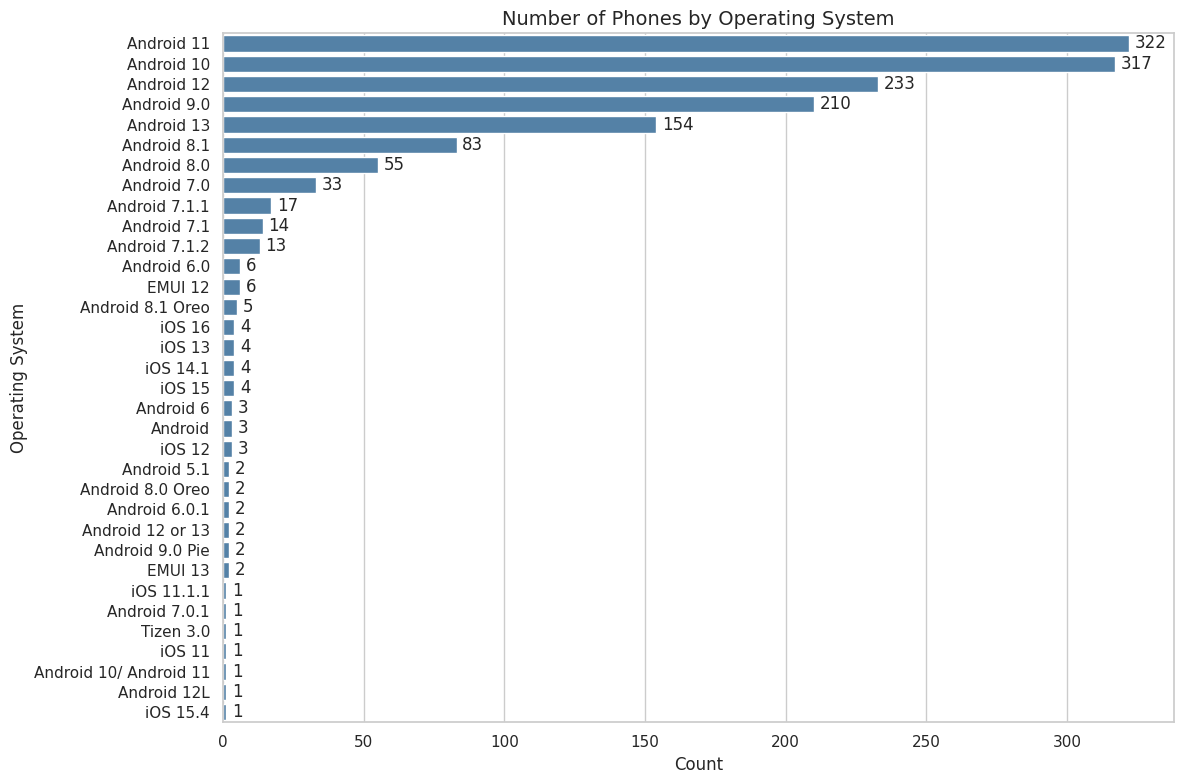

In [20]:
# Count the number of phones by operating system
# and visualize it using a horizontal bar plot
os_counts = phone_df['os'].value_counts().reset_index()
os_counts.columns = ['os', 'count']

# Plot the distribution of phone counts across different operating systems
plt.figure(figsize=(12, 8))
sns.barplot(
    data=os_counts,
    x='count',
    y='os',
    color='steelblue',
    errorbar=None
)
plt.title('Number of Phones by Operating System', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Operating System')

# Add data labels to each bar for clarity
for index, row in os_counts.iterrows():
    plt.text(row['count'] + 2, index, str(row['count']), va='center')

plt.tight_layout()
plt.show()


**It can be observed from the chart that:**

* Android dominates the dataset, with several versions showing high phone counts.

* Android 11 has the highest representation, with 322 phones, followed closely by Android 10 with 317.

* Android 12 is also well-represented with 233 phones, while earlier versions like Android 9.0 and 8.1 remain notable.

* iOS versions appear much less frequent, typically with single-digit counts.

* EMUI and other niche or older operating systems have minimal representation in the dataset.

### Distribution of Battery Types By Brand

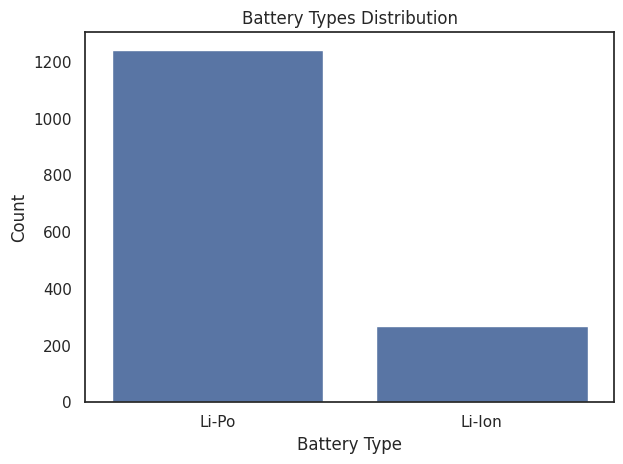

In [21]:
# Visualize the distribution of battery types in the dataset
sns.set_style('white')  # Set a clean background style for the plot
sns.countplot(data=phone_df, x='battery_type')  # Count each battery type
plt.title('Battery Types Distribution')  # Add a plot title
plt.xlabel('Battery Type')  # Label the x-axis
plt.ylabel('Count')  # Label the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


**It can be observed from the chart that:**

* Li-Po (Lithium Polymer) batteries are by far the most common, appearing in 1,250 phones.

* In contrast, Li-Ion (Lithium-Ion) batteries are found in only 270 phones.

In [22]:
# Create a pivot table to count the number of phones for each battery type per brand
unique_battery_count = phone_df.pivot_table(
    index=['brand'],              # Group by phone brand
    columns='battery_type',      # Separate columns by battery type
    values='price(USD)',         # Use price column to count entries
    aggfunc='count'              # Count the number of phones per battery type per brand
)

# Display the resulting pivot table
unique_battery_count

battery_type,Li-Ion,Li-Po
brand,,
Apple,22.0,NaN
Google,6.0,13.0
Honor,3.0,121.0
Huawei,31.0,106.0
LG,27.0,48.0
Lenovo,14.0,29.0
OnePlus,NaN,47.0
Oppo,24.0,189.0
Realme,6.0,151.0


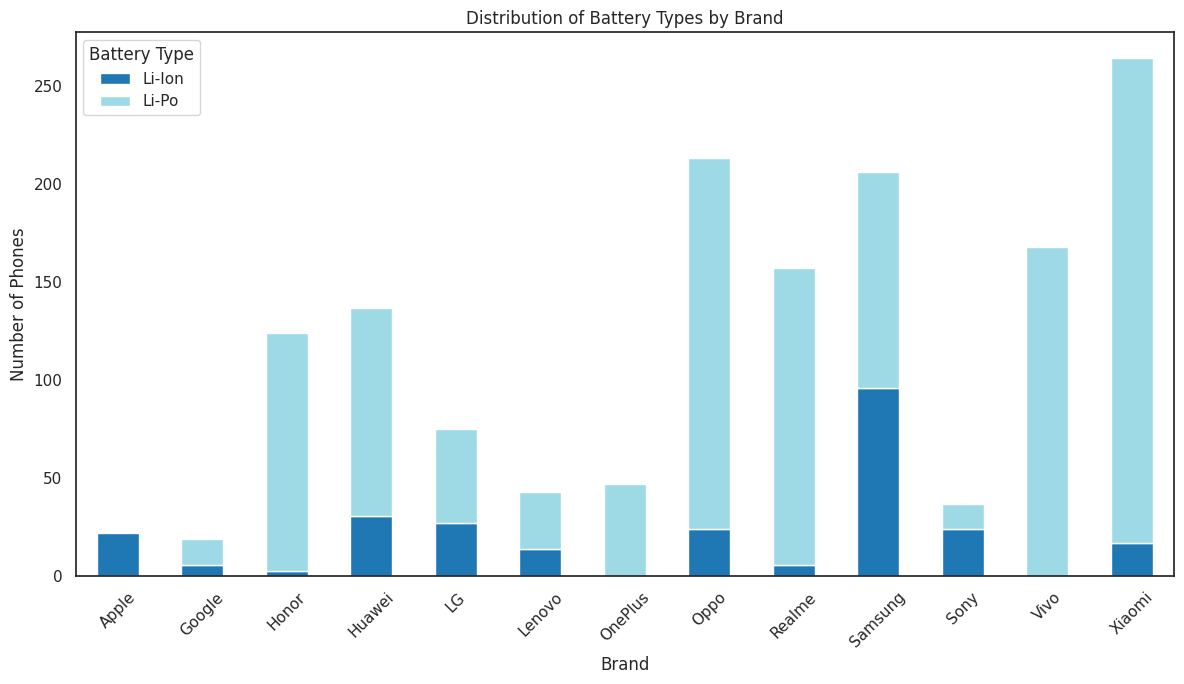

In [23]:
unique_battery_count.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Distribution of Battery Types by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Phones')
plt.xticks(rotation=45)
plt.legend(title='Battery Type')
plt.tight_layout()
plt.show()


**It can be observed from the chart that:**

* Li-Po (Lithium Polymer) batteries are more widely used across most brands, generally dominating the total battery count per brand.

* Xiaomi has a particularly high number of Li-Po battery phones, with very few using Li-Ion.

* Oppo and Vivo also strongly favor Li-Po batteries.

* Samsung and Huawei have noticeable counts of both Li-Po and Li-Ion batteries, but Li-Po remains more prevalent overall.

* Apple and Google, though having fewer models in the dataset, primarily use Li-Ion batteries.

* Other brands such as Honor, LG, Lenovo, OnePlus, Realme, and Sony also show a clear preference for Li-Po batteries, though proportions differ slightly.

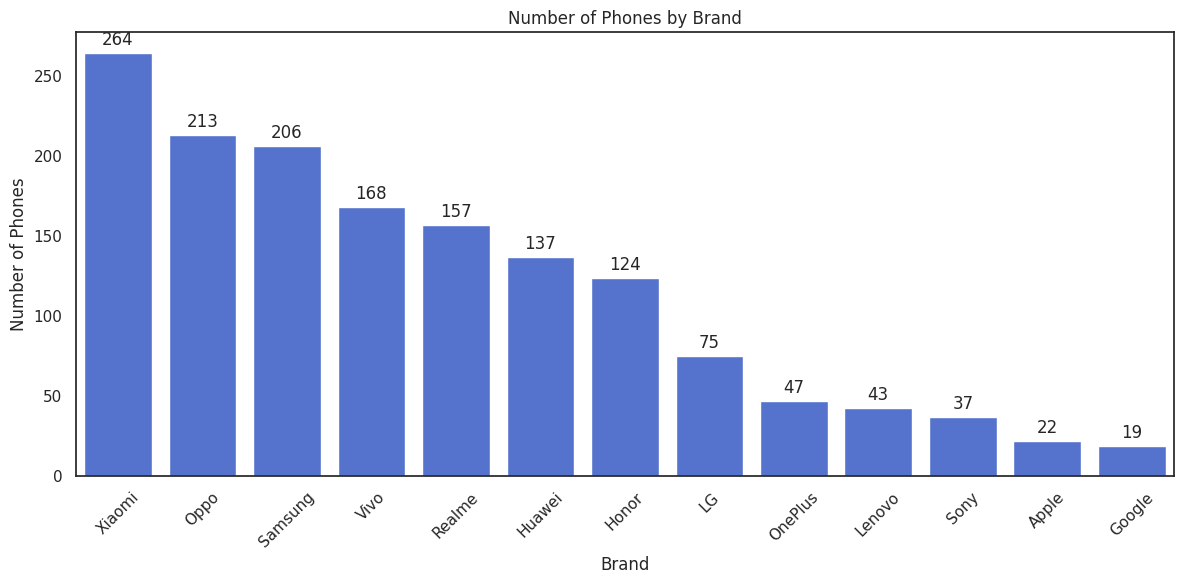

In [24]:
# Count number of phones per brand
phone_counts = phone_df['brand'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.set_style('white')
ax = sns.barplot(x=phone_counts.index, y=phone_counts.values, color='royalblue')

# Title and labels
plt.title('Number of Phones by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Phones')
plt.xticks(rotation=45)

# Add counts on bars
for i, count in enumerate(phone_counts.values):
    ax.text(i, count + 5, str(count), ha='center')

plt.tight_layout()
plt.show()


**It can be observed from the chart that:**

* Xiaomi has the highest number of phones in this dataset, totaling 264.

* Oppo and Samsung also have a large number of models, with 213 and 206 respectively.

* Vivo and Realme follow, with 168 and 157 phones each.

* Huawei and Honor have similar figures, at 137 and 124.

* LG has a more modest presence, contributing 75 phones.

* Brands like OnePlus, Lenovo, and Sony are less represented, each with fewer than 50 phones.

* Apple and Google have the smallest number of phones recorded, with 22 and 19 respectively.

Average Phone Price By RAM Size

In [25]:
# Count the number of phones for each unique RAM size (in GB)
phone_df['ram(GB)'].value_counts()

,count
ram(GB),
8,736
6,277
4,261
3,98
2,50
12,42
16,30
1,11
24,3


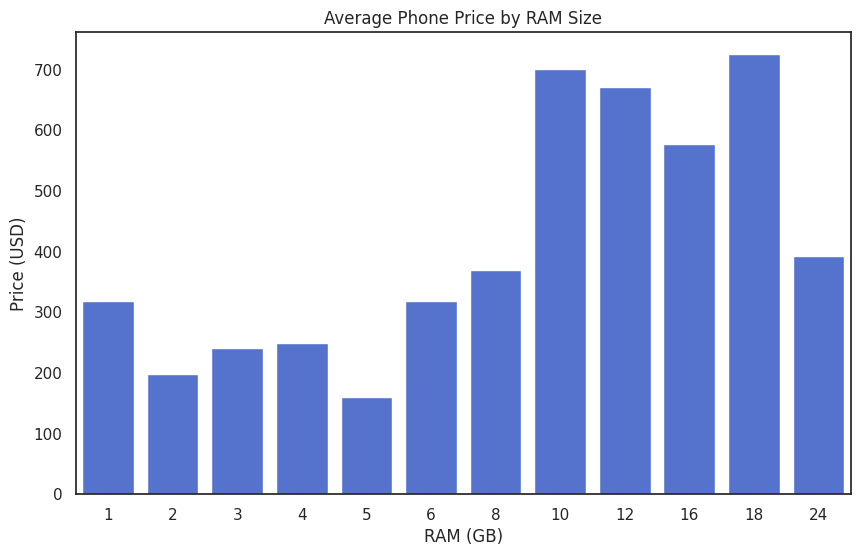

In [26]:
# Plot the average phone price for each RAM size
plt.figure(figsize=(10,6))
sns.barplot(x='ram(GB)', y='price(USD)', data=phone_df, color='royalblue', errorbar=None)
plt.title('Average Phone Price by RAM Size')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (USD)')
plt.show()

How much does a phone on each OS version cost?

In [27]:
phone_df.groupby('os')['price(USD)'].mean().reset_index().sort_values(by = 'price(USD)', ascending = False)

,os,price(USD)
6,Android 12L,1179.000000
33,iOS 16,1012.542500
31,iOS 15,952.427500
30,iOS 14.1,835.442500
18,Android 8.0 Oreo,795.000000
23,EMUI 12,523.526667
32,iOS 15.4,498.000000
0,Android,463.333333
28,iOS 12,420.000000
7,Android 13,415.018831


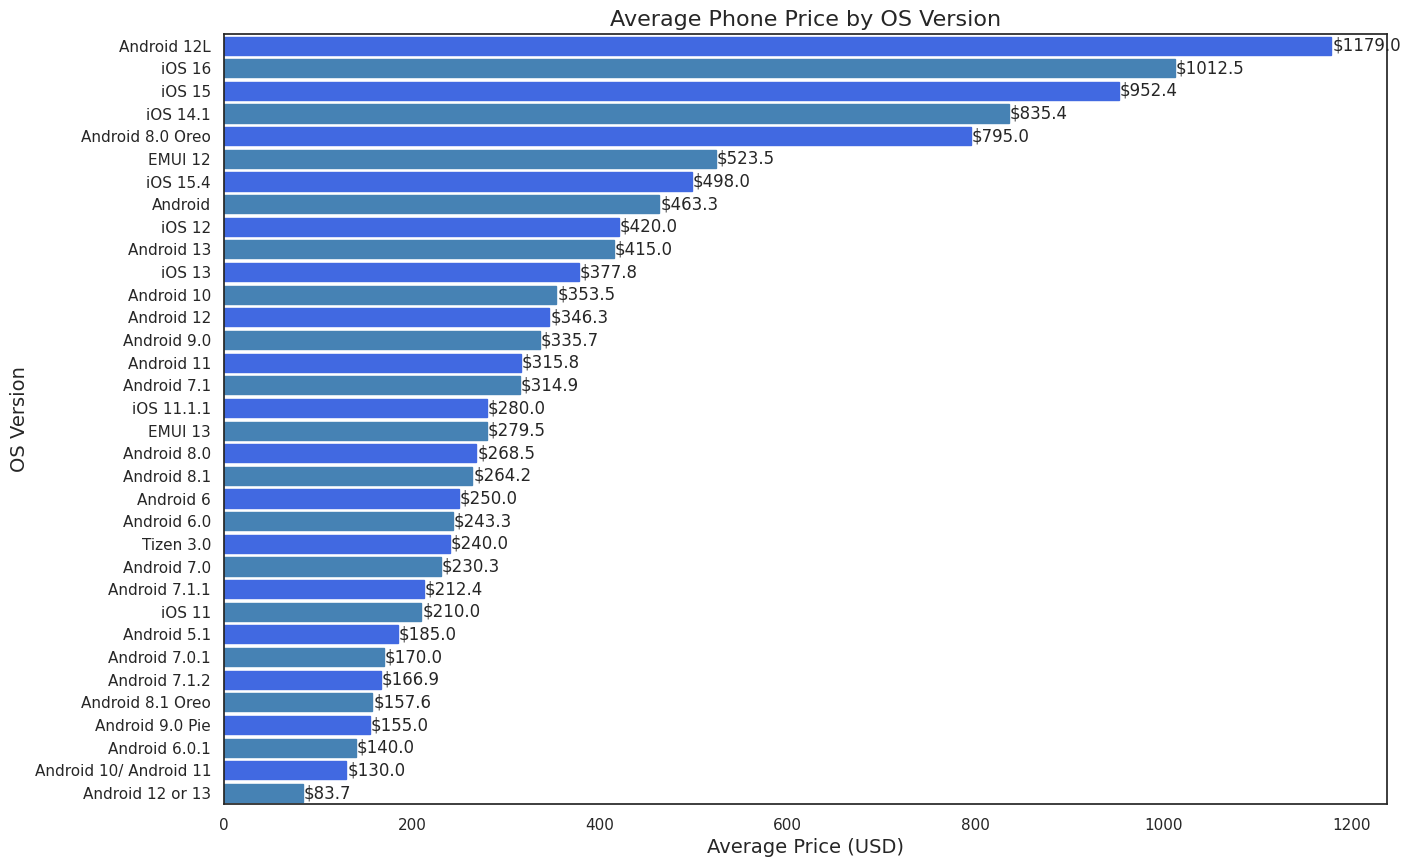

In [28]:
os_mean_prices = phone_df.groupby('os')['price(USD)'].mean().reset_index().sort_values(by='price(USD)', ascending=False)

# Create a list of colors, alternating royalblue and a complementary color (e.g., steelblue)
colors = ['royalblue' if i % 2 == 0 else 'steelblue' for i in range(len(os_mean_prices))]

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(y='os', x='price(USD)', data=os_mean_prices, palette=None, color=None)

# Manually set bar colors
for bar, color in zip(ax.patches, colors):
    bar.set_color(color)

# Annotate bars with the price values
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'${width:.1f}', (width + 1, p.get_y() + p.get_height() / 2),
                va='center', fontsize=12)

plt.title('Average Phone Price by OS Version', fontsize=16)
plt.xlabel('Average Price (USD)', fontsize=14)
plt.ylabel('OS Version', fontsize=14)
plt.show()


**It can be seen from the above chart that the:**

- Android 12L has the highest average phone price at $1,179.

- Recent iOS versions (iOS 16 and iOS 15) also command high average prices, at $1,012.5 and $952.4 respectively, with iOS 14.1 following at $835.4.
- Some Android versions such as Android 8.0 Oreo and EMUI 12 show relatively high average prices.

- The average phone price varies significantly across OS versions, indicating different market segments.

- Generally, newer iOS versions have higher average prices compared to most Android versions, consistent with Apple's premium brand positioning.

- Several Android versions fall within a mid-range price bracket ($300–$500), reflecting a broad diversity of devices.

- Older Android versions and less common OSs like Tizen tend to have lower average prices.

- Interestingly, Android 12 and 13 have notably low average prices (~$83.7), possibly due to budget or entry-level devices running these OS versions. This warrants further investigation to confirm data validity.


# 5

## Splitting the dataset into the Training set and Test set

In [29]:
# Defining target and features
X = phone_df.drop(columns=['price(USD)'])    #feature variable
y = phone_df['price(USD)']  #target variable

#### Identifying Column Types

In [30]:
# automatically detects the column types based on their data types.

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()

In [31]:
# confirming numericl features
numerical_features

['inches', 'battery', 'ram(GB)', 'weight(g)', 'storage(GB)']

In [32]:
#  confirming categorical features
categorical_features

['brand',
 'os',
 'resolution',
 'battery_type',
 'video_720p',
 'video_1080p',
 'video_4K',
 'video_8K',
 'video_30fps',
 'video_60fps',
 'video_120fps',
 'video_240fps',
 'video_480fps',
 'video_960fps']

#### Building Preprocessing Pipeline

In [33]:
# Building preprocessing pipeline
column_transformer = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

# Fitting and transforming the features
X_transformed = column_transformer.fit_transform(X)


##### Splitting the Data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

##### Output Check

In [35]:
print("Preprocessing complete.")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Preprocessing complete.
Train shape: (1209, 159), Test shape: (303, 159)


Initialize models

In [36]:
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 6

## Model Training

Train the Linear Regression model

In [37]:
print("Training Linear Regression model...")
linear_model.fit(X_train, y_train)
print("Linear Regression training complete.")

Training Linear Regression model...
Linear Regression training complete.


Train the Random Forest Regressor model


In [38]:
print("Training Random Forest Regressor model...")
random_forest_model.fit(X_train, y_train)
print("Random Forest Regressor training complete.")

Training Random Forest Regressor model...
Random Forest Regressor training complete.



Make predictions

In [39]:
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# 7

## Model Evaluation

In [40]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nLinear Regression Evaluation:")
print(f"Mean Squared Error: {mse_linear:.2f}")
print(f"R-squared: {r2_linear:.2f}")

print("\nRandom Forest Regressor Evaluation:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")



Linear Regression Evaluation:
Mean Squared Error: 64457.29
R-squared: 0.08

Random Forest Regressor Evaluation:
Mean Squared Error: 62791.17
R-squared: 0.11


# 8

## Testing the Model with Test Data


In [41]:
# Sample data for test

new_phone_data = pd.DataFrame([{
    'brand': 'Apple',
    'inches': 6.1,
    'battery': 3561,
    'ram(GB)': 8,
    'weight(g)': 170,
    'storage(GB)': 128,
    'os': 'iOS 16',
    'battery_type': 'Li-Ion',
    'announcement_year': 2024,
    'video_720p': False,
    'video_1080p': True,
    'video_4K': True,
    'video_8K': False,
    'video_30fps': True,
    'video_60fps': True,
    'video_120fps': False,
    'video_240fps': False,
    'video_480fps': False,
    'video_960fps': False,
    'resolution': '1179x2556',
    'phone_name': 'Sample Iphone'
}])

In [42]:
new_phone_data

,brand,inches,battery,ram(GB),weight(g),storage(GB),os,battery_type,announcement_year,video_720p,...,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,resolution,phone_name
0,Apple,6.1,3561,8,170,128,iOS 16,Li-Ion,2024,False,...,True,False,True,True,False,False,False,False,1179x2556,Sample Iphone 16


### Aligning Feature Columns for Prediction

In [43]:
# Ensure the columns are in the same order as the original training data's features (X)
# This is crucial for the ColumnTransformer to work correctly
new_phone_data = new_phone_data[X.columns.tolist()]

For prediction of the model for both Random Forest and Linear Regression


In [44]:
try:
    new_phone_data_transformed = column_transformer.transform(new_phone_data)

    # Make prediction using the Random Forest model
    predicted_price_rf = random_forest_model.predict(new_phone_data_transformed)

    print(f"\nPredicted price for the new phone using Random Forest: ${predicted_price_rf[0]:.2f}")

    # Make prediction using the Linear Regression model
    predicted_price_linear = linear_model.predict(new_phone_data_transformed)

    print(f"Predicted price for the new phone using Linear Regression: ${predicted_price_linear[0]:.2f}")

except ValueError as e:
    print(f"\nError predicting new data: {e}")
    print("Please ensure the new data has the same columns and data types as the training data before preprocessing.")
    print(f"Columns in new data: {new_phone_data.columns.tolist()}")
    # You might want to print the expected columns from the original X
    print(f"Expected columns: {X.columns.tolist()}")




Predicted price for the new phone using Random Forest: $360.70
Predicted price for the new phone using Linear Regression: $870.18


# 9

## Hyperparameter Tuning

Use GridsearchCV or equivalent to optimise at least 3 parameter per model

#### Hyperparameter Tuning for Linear Regression

In [45]:
# Define parameter grids for each model
# Parameter grid for Linear Regression (This is the only parmeter to tune for Linear Regression)
param_grid_linear = {
    'fit_intercept': [True, False]
}

# Parameter grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
    # Add more parameters as needed, e.g., 'min_samples_leaf', 'max_features'
}

# Initialize GridSearchCV for Linear Regression
print("\nPerforming Grid Search for Linear Regression...")
grid_search_linear = GridSearchCV(estimator=linear_model, param_grid=param_grid_linear,
                                  scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV on the training data for Linear Regression
grid_search_linear.fit(X_train, y_train)

print("Grid Search for Linear Regression complete.")
print("Best parameters for Linear Regression:", grid_search_linear.best_params_)
print("Best cross-validation score (Negative MSE):", grid_search_linear.best_score_)

# Evaluate the best Linear Regression model found by Grid Search
best_linear_model = grid_search_linear.best_estimator_
y_pred_linear_tuned = best_linear_model.predict(X_test)

mse_linear_tuned = mean_squared_error(y_test, y_pred_linear_tuned)
r2_linear_tuned = r2_score(y_test, y_pred_linear_tuned)

print("\nTuned Linear Regression Evaluation:")
print(f"Mean Squared Error: {mse_linear_tuned:.2f}")
print(f"R-squared: {r2_linear_tuned:.2f}")



# Using `best_linear_model` for making predictions
# For example, predicting on the new_phone_data using the best Random Forest model:
try:
    new_phone_data_transformed = column_transformer.transform(new_phone_data[X.columns.tolist()])
    predicted_price_linear_tuned = best_linear_model.predict(new_phone_data_transformed)
    print(f"Predicted price for the new phone using Tuned Linear Regression: ${predicted_price_linear_tuned[0]:.2f}")

except ValueError as e:
    print(f"\nError predicting new data with tuned models: {e}")
    print("Please ensure the new data has the same columns and data types as the training data before preprocessing.")




Performing Grid Search for Linear Regression...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Grid Search for Linear Regression complete.
Best parameters for Linear Regression: {'fit_intercept': True}
Best cross-validation score (Negative MSE): -63520.982666665106

Tuned Linear Regression Evaluation:
Mean Squared Error: 64457.29
R-squared: 0.08
Predicted price for the new phone using Tuned Linear Regression: $870.18


#### Hyperparameter Tuning for Random Forest Regressor

In [46]:
# Initialize GridSearchCV for Random Forest
print("\nPerforming Grid Search for Random Forest Regressor...")
grid_search_rf = GridSearchCV(estimator=random_forest_model, param_grid=param_grid_rf,
                              scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data for Random Forest
grid_search_rf.fit(X_train, y_train)

print("Grid Search for Random Forest Regressor complete.")
print("Best parameters for Random Forest Regressor:", grid_search_rf.best_params_)
print("Best cross-validation score (Negative MSE):", grid_search_rf.best_score_)

# Evaluate the best Random Forest model found by Grid Search
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("\nTuned Random Forest Regressor Evaluation:")
print(f"Mean Squared Error: {mse_rf_tuned:.2f}")
print(f"R-squared: {r2_rf_tuned:.2f}")

# Using `best_rf_model` for making predictions
# For example, predicting on the new_phone_data using the best Random Forest model:
try:
    new_phone_data_transformed = column_transformer.transform(new_phone_data[X.columns.tolist()])
    predicted_price_rf_tuned = best_rf_model.predict(new_phone_data_transformed)
    print(f"\nPredicted price for the new phone using Tuned Random Forest: ${predicted_price_rf_tuned[0]:.2f}")


except ValueError as e:
    print(f"\nError predicting new data with tuned models: {e}")
    print("Please ensure the new data has the same columns and data types as the training data before preprocessing.")




Performing Grid Search for Random Forest Regressor...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Grid Search for Random Forest Regressor complete.
Best parameters for Random Forest Regressor: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation score (Negative MSE): -53167.42231590689

Tuned Random Forest Regressor Evaluation:
Mean Squared Error: 57679.27
R-squared: 0.18

Predicted price for the new phone using Tuned Random Forest: $426.63


# 10

## Model Evaluation on Test Data

Evalute: report MAE, MSE, RMSE and R2 on a held-out  test set.


### Metrics Being Reported

For each model, the following evaluation metrics are computed:


- **MAE (Mean Absolute Error):**
Average absolute difference between predicted and actual values. Lower is better.

- **MSE (Mean Squared Error):**
Average of squared errors. Penalizes larger errors more heavily than MAE.

- **RMSE (Root Mean Squared Error):**
Square root of MSE, brings error back to the same units as the target variable.

- **R² (R-squared):**
Indicates how well the model explains the variance in the target. Closer to 1 means better performance.

In [47]:
# Evaluate Linear Regression model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

print("\nLinear Regression Evaluation Metrics:")
print(f"MAE: {mae_linear:.2f}")
print(f"MSE: {mse_linear:.2f}")
print(f"RMSE: {rmse_linear:.2f}")
print(f"R2: {r2_linear:.2f}")

# Evaluate Random Forest Regressor model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("\nRandom Forest Regressor Evaluation Metrics:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R2: {r2_rf:.2f}")

# Evaluate the best Linear Regression model found by Grid Search
mae_linear_tuned = mean_absolute_error(y_test, y_pred_linear_tuned)
rmse_linear_tuned = np.sqrt(mse_linear_tuned)

print("\nTuned Linear Regression Evaluation Metrics:")
print(f"MAE: {mae_linear_tuned:.2f}")
print(f"MSE: {mse_linear_tuned:.2f}")
print(f"RMSE: {rmse_linear_tuned:.2f}")
print(f"R2: {r2_linear_tuned:.2f}")


# Evaluate the best Random Forest model found by Grid Search
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)

print("\nTuned Random Forest Regressor Evaluation Metrics:")
print(f"MAE: {mae_rf_tuned:.2f}")
print(f"MSE: {mse_rf_tuned:.2f}")
print(f"RMSE: {rmse_rf_tuned:.2f}")
print(f"R2: {r2_rf_tuned:.2f}")


Linear Regression Evaluation Metrics:
MAE: 157.63
MSE: 64457.29
RMSE: 253.88
R2: 0.08

Random Forest Regressor Evaluation Metrics:
MAE: 143.71
MSE: 62791.17
RMSE: 250.58
R2: 0.11

Tuned Linear Regression Evaluation Metrics:
MAE: 157.63
MSE: 64457.29
RMSE: 253.88
R2: 0.08

Tuned Random Forest Regressor Evaluation Metrics:
MAE: 139.42
MSE: 57679.27
RMSE: 240.17
R2: 0.18


# 11

## Feature Importance Analysis (Random Forest)

Identifying and analyzing the most influential features as determined by the tuned Random Forest model

<ipython-input-48-e6dc2b411337>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


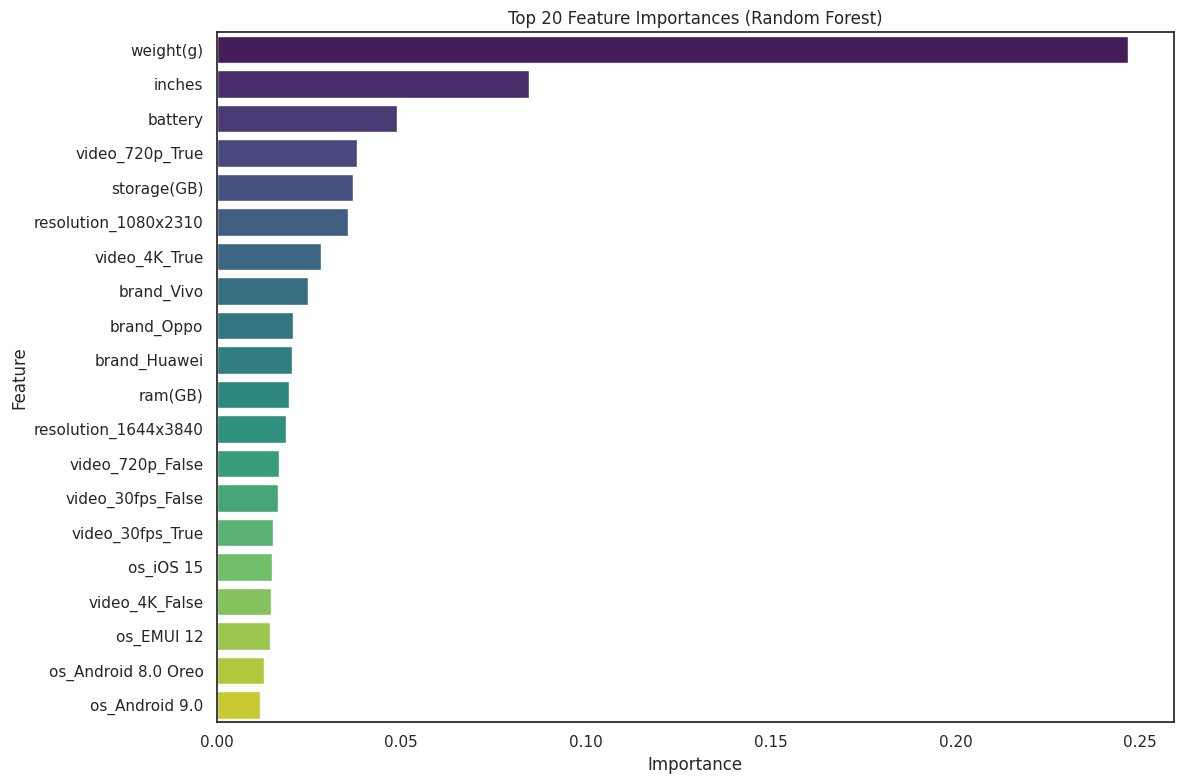


Top 10 Feature Importances:


,feature,importance
3,weight(g),0.246791
0,inches,0.084467
1,battery,0.048918
140,video_720p_True,0.037999
4,storage(GB),0.036844
60,resolution_1080x2310,0.035649
144,video_4K_True,0.028198
16,brand_Vivo,0.024640
12,brand_Oppo,0.020593
8,brand_Huawei,0.020302


In [48]:
# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Combine numerical and one-hot encoded categorical feature names
numerical_feature_names = numerical_features
onehot_features = column_transformer.transformers_[1][1].get_feature_names_out(categorical_features)
all_feature_names = numerical_feature_names + list(onehot_features)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot top 20 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(
    x='importance',
    y='feature',
    data=feature_importance_df.head(20),
    palette='viridis',
    errorbar=None  # Suppress confidence interval lines
)
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print top 10 features to console
print("\nTop 10 Feature Importances:")
feature_importance_df.head(10)


- **Physical attributes** such as **weight** and **screen size (inches)** have the highest influence on price prediction.
- Battery capacity and storage size also contribute notably.
- Some specific **video recording capabilities** (e.g., 720p and 4K video support) affect price, likely reflecting higher-end features.
- **Brand identity** (notably Vivo, Oppo, Huawei) influences pricing, highlighting brand value perception.

### Why is this useful?
- These insights guide further feature engineering and business strategy.
- Focusing on most impactful features can optimize data collection and modeling efforts.
- Helps explain model decisions to stakeholders for transparency.


# 12

## Conclusion

In this project, I developed and evaluated two regression models — **Linear Regression** and **Random Forest Regressor** — to predict smartphone prices based on a set of numerical and categorical features.

### Model Evaluation (Before Tuning)

| Model                  | MAE     | MSE       | RMSE    | R²    |
|------------------------|---------|-----------|---------|-------|
| Linear Regression      | 157.63  | 64,457.29 | 253.88  | 0.08  |
| Random Forest Regressor| 143.71  | 62,791.17 | 250.58  | 0.11  |

At baseline, the **Random Forest Regressor** outperformed Linear Regression across all metrics, though both models exhibited low R² values, indicating limited explanatory power over price variance.

### Hyperparameter Tuning and Its Impact

Hyperparameter tuning is a process of systematically searching for the best model parameters that are not learned during training but set prior to training. Proper tuning can significantly improve a model's predictive performance by adjusting model complexity and regularization:

- **Linear Regression Tuning:** I tested whether to fit the intercept term or not (`fit_intercept`). This has limited impact on model flexibility.
  
- **Random Forest Tuning:** I optimized key parameters such as:
  - `n_estimators`: Number of trees in the forest — more trees generally improve performance but increase computational cost.
  - `max_depth`: Maximum depth of each tree — controls model complexity and prevents overfitting.
  - `min_samples_split`: Minimum number of samples required to split a node — larger values can regularize and simplify the model.

By searching across combinations of these parameters using **GridSearchCV** with cross-validation, I identified configurations that minimize the prediction error on unseen data.

| Model                  | MAE     | MSE       | RMSE    | R²    |
|------------------------|---------|-----------|---------|-------|
| Tuned Linear Regression| 157.63  | 64,457.29 | 253.88  | 0.08  |
| Tuned Random Forest    | 139.42  | 57,679.27 | 240.17  | 0.18  |

Tuning notably improved the Random Forest model’s performance, reducing error metrics and increasing the R² score by approximately 0.07, highlighting better fit and generalization. The Linear Regression model showed no change, reflecting its simpler nature and fewer tunable parameters.

### Price Prediction for Sample New iPhone

Using the tuned models to predict the price of a hypothetical **iPhone**, I obtained:

- **Random Forest Prediction:** **$426.63**

- **Linear Regression Prediction:** **$870.18**

The Random Forest model’s prediction is more conservative and consistent with its overall better performance.

### Summary and Recommendations

- The **Random Forest Regressor** is the preferred model due to its stronger predictive ability and responsiveness to tuning.
- Hyperparameter tuning is essential to enhance model performance by balancing bias and variance.
- Further improvements could come from:
  - Adding more relevant features or engineered features.
  - Collecting more data for training.
  - Exploring other models or ensembling techniques.
  - Continuous retraining as new smartphone data becomes available.

This analysis provides a foundation for predictive modeling of smartphone prices, with potential applications in market analysis, price optimization, and consumer insights.

---
